<a href="https://colab.research.google.com/github/Spin-Chemistry-Labs/radicalpy/blob/187-google-colab-tutorials/examples/tutorials/03_introduction_to_spin_hamiltonians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tutorial 3 - Introduction to spin Hamiltonians



&copy; Lewis M. Antill, 2025

This tutorial aims to introduce the key concepts of [radical pairs](https://en.wikipedia.org/wiki/Spin_chemistry), [Kronecker products](https://en.wikipedia.org/wiki/Kronecker_product), product operators, [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors), and [Larmor precession](https://en.wikipedia.org/wiki/Larmor_precession).

In [ ]:
!pip install radicalpy

In [53]:
import numpy as np
import radicalpy as rp
import sympy as smp

---
    
### Combining two spin-1/2 particles

Radical pairs are two paired electrons (as the name suggests). Two electrons can be paired in the following ways,

$$
\begin{aligned}
\color{green}{S_A} &= \frac{1}{2}, \,\color{blue}{S_B} = \frac{1}{2} \\
S_{tot} &= \color{green}{S_A} - \color{blue}{S_B} = \color{orange}{0} \\
&= \color{green}{S_A} + \color{blue}{S_B} = \color{purple}{1}
\end{aligned}
$$

When $S_{tot} = \color{orange}{0}$, the two electrons are antiparallel (**one** <font color='magenta'>spin up</font> and **one** <font color='red'>spin down</font>), therefore spin allowed and in a <font color='orange'>singlet state</font> ([link](https://en.wikipedia.org/wiki/Singlet_state)). For $S_{tot} = \color{purple}{1}$, the two electrons are parallel (**both** are either <font color='magenta'>spin up</font> or <font color='red'>spin down</font>) and are now in a <font color='purple'>triplet state</font> ([link](https://en.wikipedia.org/wiki/Triplet_state)).

---

### Spin operators

Spin states for electron one are $\color{green}{|\alpha_1⟩}\color{green}{|\beta_1⟩}$ and are eigenfunctions of $\color{green}{|\hat{S}_{Az}⟩}$, and for electron two we have $\color{blue}{|\alpha_2⟩}\color{blue}{|\beta_2⟩}$ and are eigenfunctions of $\color{blue}{|\hat{S}_{Bz}⟩}$. For a radical pair, it is clear that there are four eigenfunctions $\color{green}{|\alpha_1⟩}$, $\color{green}{|\beta_1⟩}$, $\color{blue}{|\alpha_2⟩}$, and $\color{blue}{|\beta_2⟩}$, from which there are four possible [ket](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation) combinations and are known as the product states,

$$
\begin{aligned}
&\color{green}{|\alpha_1⟩}\color{blue}{|\alpha_2⟩} = |\alpha_1\alpha_2⟩ \\
&\color{green}{|\alpha_1⟩}\color{blue}{|\beta_2⟩} = |\alpha_1\beta_2⟩ \\
&\color{green}{|\beta_1⟩}\color{blue}{|\alpha_2⟩} = |\beta_1\alpha_2⟩ \\
&\color{green}{|\beta_1⟩}\color{blue}{|\beta_2⟩} = |\beta_1\beta_2⟩ 
\end{aligned}
$$

Now we would like to form two separate spin operators for electron one and electron two. We can form spin operators using the Pauli matrices that we introduced in tutorial 1. The spin operators can be created by taking the Kronecker product of one of the Pauli matrices with the identity matrix ($\hat{I}$), 

$$
\begin{aligned}
&\color{green}{|\hat{S}_{Az}⟩} = \color{green}{|\hat{\sigma}_{Az}⟩}⊗|\hat{I}⟩ \\
&\color{blue}{|\hat{S}_{Bz}⟩} = |\hat{I}⟩⊗\color{blue}{|\hat{\sigma}_{Bz}⟩}
\end{aligned}
$$

Now let's calculate these computationally.

---

#### Pauli matrices

The `np.array()` function allows us to build our desired array.

In [2]:
factor = 0.5
sigma = factor * np.array(
    [
        [[0, 1], [1, 0]],
        [[0, -1j], [1j, 0]],
        [[1, 0], [0, -1]],
    ]
)
I = np.eye(2)

Sx_smp = smp.Matrix([[0, 0.5], [0.5, 0]])
Sy_smp = smp.Matrix([[0, -0.5j], [0.5j, 0]])
Sz_smp = smp.Matrix([[0.5, 0], [0, -0.5]])
I_smp = smp.eye(2)

---

#### Spin operators

The next step is to produce the spin operators, which are created by taking the Kronecker product of one of the Pauli matrices with the identity matrix ($\hat{I}$). The Kronecker product function `smp.KroneckerProduct()` displays the operation, whereas the `smp.kronecker_product()` function shows the result of the operation. Using the `smp.Eq()` function, we can combine the two aforementioned functions to display both operation and result.

In [3]:
# Radical A
SAx_smp = smp.Eq(smp.KroneckerProduct(Sx_smp,I_smp), smp.kronecker_product(Sx_smp,I_smp)) 
SAy_smp = smp.Eq(smp.KroneckerProduct(Sy_smp,I_smp), smp.kronecker_product(Sy_smp,I_smp)) 
SAz_smp = smp.Eq(smp.KroneckerProduct(Sz_smp,I_smp), smp.kronecker_product(Sz_smp,I_smp)) 

# Radical B
SBx_smp = smp.Eq(smp.KroneckerProduct(I_smp,Sx_smp), smp.kronecker_product(I_smp,Sx_smp)) 
SBy_smp = smp.Eq(smp.KroneckerProduct(I_smp,Sy_smp), smp.kronecker_product(I_smp,Sy_smp)) 
SBz_smp = smp.Eq(smp.KroneckerProduct(I_smp,Sz_smp), smp.kronecker_product(I_smp,Sz_smp)) 

In [4]:
SAz_smp

Eq(KroneckerProduct(Matrix([
[0.5,    0],
[  0, -0.5]]), Matrix([
[1, 0],
[0, 1]])), Matrix([
[0.5,   0,    0,    0],
[  0, 0.5,    0,    0],
[  0,   0, -0.5,    0],
[  0,   0,    0, -0.5]]))

In [5]:
SBz_smp

Eq(KroneckerProduct(Matrix([
[1, 0],
[0, 1]]), Matrix([
[0.5,    0],
[  0, -0.5]])), Matrix([
[0.5,    0,   0,    0],
[  0, -0.5,   0,    0],
[  0,    0, 0.5,    0],
[  0,    0,   0, -0.5]]))

We can use the `np.kron()` function to take the Kronecker product of two matrices.

In [10]:
SAx = np.kron(sigma[0], I)
SAy = np.kron(sigma[1], I)
SAz = np.kron(sigma[2], I)

SBx = np.kron(I, sigma[0])
SBy = np.kron(I, sigma[1])
SBz = np.kron(I, sigma[2])

In [11]:
SBz

array([[ 0.5+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j, -0.5+0.j,  0. +0.j, -0. +0.j],
       [ 0. +0.j,  0. +0.j,  0.5+0.j,  0. +0.j],
       [ 0. +0.j, -0. +0.j,  0. +0.j, -0.5+0.j]])

---

### Product operators

Now that we can create spin operators, we can move on to the next step and combine the two electrons producing product operators. The product of the total electron spin (one and two) operators can be calculated by the following,

$$
\color{green}{\hat{S}_A}\color{blue}{\hat{S}_B} = (\color{green}{S_{Ax}}\color{blue}{S_{Bx}}+\color{green}{S_{Ay}}\color{blue}{S_{By}}+\color{green}{S_{Az}}\color{blue}{S_{Bz}})
$$

Which gives,

$$
\color{green}{\hat{S}_A}\color{blue}{\hat{S}_B} = \frac{\hbar^2}{4}\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & -1 & 2 & 0 \\ 0 & 2 & -1 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}
$$

We can calculate this in Python using the following expression (the `@` symbol is the [dot product](https://en.wikipedia.org/wiki/Dot_product) operator),

In [52]:
SASB = SAx @ SBx + SAy @ SBy + SAz @ SBz
print(SASB)

[[ 0.25+0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.25+0.j  0.5 +0.j  0.  +0.j]
 [ 0.  +0.j  0.5 +0.j -0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.25+0.j]]


We can now calculate the energies and states of the radical pair by acquiring the eigenvalues `E` (energies) and eigenvectors `V` (states).

---

### Eigenvectors and eigenvalues - zero field

In [ ]:
E, V = np.linalg.eigh(SASB)
print(V)
print(E)

[[ 0.        +0.j  1.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [-0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j]]
[-0.75  0.25  0.25  0.25]


Now let's look at the above eigenvalues and eigenvectors for the radical pair. The eigenvector matrix `V` represents the four different states of the radical pair, where columns one, two, three, and four are $\color{orange}{|S⟩}$, $\color{purple}{|T_+⟩}$, $\color{purple}{|T_0⟩}$, and $\color{purple}{|T_-⟩}$, respectively. Additionally, rows one, two, three, and four are $\color{green}{|\alpha_1⟩}\color{blue}{|\alpha_2⟩}$, $\color{green}{|\alpha_1⟩}\color{blue}{|\beta_2⟩}$, $\color{green}{|\beta_1⟩}\color{blue}{|\alpha_2⟩}$, and $\color{green}{|\beta_1⟩}\color{blue}{|\beta_2⟩}$, respectively. The states are given by,

$$
\begin{aligned}
&\color{orange}{|S⟩} = \frac{1}{\sqrt{2}}(\color{green}{|\alpha_1⟩}\color{blue}{|\beta_2⟩}-\color{green}{|\beta_1⟩}\color{blue}{|\alpha_2⟩}) \\
&\color{purple}{|T_+⟩} = \color{green}{|\alpha_1⟩}\color{blue}{|\alpha_2⟩}) \\
&\color{purple}{|T_0⟩} = \frac{1}{\sqrt{2}}(\color{green}{|\alpha_1⟩}\color{blue}{|\beta_2⟩}+\color{blue}{|\beta_1⟩}\color{green}{|\alpha_2⟩}) \\
&\color{purple}{|T_-⟩} = \color{green}{|\beta_1⟩}\color{blue}{|\beta_2⟩})
\end{aligned}
$$

The eigenvalue vector `E` represents the energies of the <font color='orange'>singlet state</font> at $-0.75$ or E = $-\frac{3}{4}$ and the three [degenerate](https://en.wikipedia.org/wiki/Degenerate_energy_levels) <font color='purple'>triplet states</font> each with a higher energy of $0.25$ or E = $\frac{1}{4}$.

---

### Coupled basis vs product basis

Coupled spin basis vectors are linear combinations of product basis vectors. In the uncoupled states there are two distinct quantum states of two spins, *e.g.*, four combinations of $|\alpha⟩$ and $|\beta⟩$ states of each particle. Information is neither lost nor gained for each representation, or in other words the two bases are equivalent.

<table class='table table-striped'> 
    <thead> 
        <tr> 
            <th scope="col">Coupled basis</th> 
            <th scope="col">Product basis</th> 
            <th scope="col">$|S, m_s⟩$</th> 
        </tr> 
    </thead> 
    <tbody> 
        <tr> 
            <th scope='row'>$\color{orange}{|S⟩}$</th> 
            <td>$\frac{1}{\sqrt{2}}(\color{green}{|\alpha_1⟩}\color{blue}{|\beta_2⟩}-\color{green}{|\beta_1⟩}\color{blue}{|\alpha_2⟩})$</td> 
            <td>$|0, 0⟩$</td> 
        </tr> 
        <tr> 
            <th scope='row'>$\color{purple}{|T_+⟩}$</th> 
            <td>$\color{green}{|\alpha_1⟩}\color{blue}{|\alpha_2⟩}$</td> 
            <td>$|1, +1⟩$</td> 
        </tr> 
        <tr> 
            <th scope='row'>$\color{purple}{|T_0⟩}$</th> 
            <td>$\frac{1}{\sqrt{2}}(\color{green}{|\alpha_1⟩}\color{blue}{|\beta_2⟩}+\color{blue}{|\beta_1⟩}\color{green}{|\alpha_2⟩})$</td> 
            <td>$|1, 0⟩$</td> 
        </tr> 
        <tr> 
            <th scope='row'>$\color{purple}{|T_-⟩}$</th> 
            <td>$\color{green}{|\beta_1⟩}\color{blue}{|\beta_2⟩}$</td> 
            <td>$|1, -1⟩$</td>
        </tr> 
        <tr> 
        </tr> 
    </tbody> 
</table>

* Coupled basis = ST basis
* Product basis = Zeeman basis = $\alpha \,/ \,\beta$ basis

---

### Converting to coupled basis

In [55]:
def ST_basis(M, spins):
    #               T+  S                T0              T-
    ST = np.array([[1,  0,               0,              0],
                   [0,  1 / np.sqrt(2),  1 / np.sqrt(2), 0],
                   [0,  -1 / np.sqrt(2), 1 / np.sqrt(2), 0],
                   [0,  0,               0,              1]])

    C = np.kron(ST, np.eye(2**(spins - 2)))
    return C @ M @ np.transpose(C)

SAz_ST = ST_basis(SAz, 2)
SBz_ST = ST_basis(SBz, 2)

In [61]:
print(SAz_ST.round(2))

[[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -0. +0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -0.5+0.j]]


In [60]:
print(SAz)

[[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -0.5+0.j -0. +0.j]
 [ 0. +0.j  0. +0.j -0. +0.j -0.5+0.j]]


---

### Larmor frequency

The electron spin magnetic moment [precesses](https://en.wikipedia.org/wiki/Precession) about an applied magnetic field ($B_0$). The [Larmor frequency](http://hyperphysics.phy-astr.gsu.edu/hbase/Nuclear/larmor.html) depends on g-values and [hyperfine states](https://en.wikipedia.org/wiki/Hyperfine_structure), where differences drive <font color='orange'>singlet</font>-<font color='purple'>triplet</font> mixing (<font color='orange'>S</font><font color='purple'>T</font>-mixing) (this will be discussed in the following tutorial). The Larmor frequency is given by,

$$
\omega = \frac{g \mu_B B_{local}}{\hbar}
$$

Where $g$ is dependent on the radical and $B_{local}$ is hyperfine dependent. The Larmor frequency of the four states of the radical pair can be represented with a vector model. Where the arrows of the <font color='orange'>singlet state</font> are pointing in the opposite direction (antiparallel) and those of <font color='purple'>triplet states</font> are pointing in the same direction (parallel).

# &emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp; <font color='orange'>$|S⟩$</font> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp; <font color='purple'>$|T_+⟩$</font> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp; <font color='purple'>$|T_0⟩$</font>  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <font color='purple'>$|T_-⟩$</font> 

<img src="figures/Z-arrow.png" width="30" height="157" align="left"/>
<img src="figures/S.gif" width="235" align="left"/>
<img src="figures/T+.gif" width="235" align="left"/>
<img src="figures/T0.gif" width="235" align="left"/>
<img src="figures/T-.gif" width="235" align="left"/>

$\color{orange}{|S⟩}$ is non-magnetic as the total spin vector (S) equals zero. S for $\color{purple}{|T_0⟩}$ possesses magnetism perpendicular to $B_0$. However, S for both $\color{purple}{|T_+⟩}$ and $\color{purple}{|T_-⟩}$ lie on the same axis as $B_0$ and are therefore magnetic along this axis. When the projection of the spin angular momentum ($\mathbf{s}$) onto the $z$-axis is specified, the $x$- and $y$-projections are greatly uncertain (because they do not [commute](https://en.wikipedia.org/wiki/Canonical_commutation_relation)). Furthermore, the spin angular momentum vector will never point parallel to the quantisation axis because the magnitude of $\mathbf{\hat{s}}$ is larger than the largest possible magnitude of its projection, where $\sqrt{S(S+1)} > S$ for $S > 0$. The above vector model displays the angular momentum vector occupying an undefined position on the surface of a cone around the quantisation axis ($z$-axis, $B_0$). 

The internal angle ($\theta$) between the $z$-axis and the surface of the cone is,

$$
\cos{\theta} = \frac{m_s}{\sqrt{S(S+1)}}
$$

where $S$ is the [spin quantum number](https://en.wikipedia.org/wiki/Spin_quantum_number) and $m_s$ is the [magnetic quantum number](https://en.wikipedia.org/wiki/Magnetic_quantum_number). Let's calculate the angle for spin-$\frac{1}{2}$ particles.

In [63]:
# The angle between the z-axis and the surface of the cone for spin-1/2 particles

ms = 0.5
S = 0.5

theta = ms/(np.sqrt(S*(S+1)))
angle = np.arccos(theta)/(np.pi/180)

print('Angle between the z-axis and the surface of the cone (in degrees) = %0.2f' %(angle))

Angle between the z-axis and the surface of the cone (in degrees) = 54.74


---

### The Hamiltonian operator for a hydrogen atom

The Hamiltonian operator can be represented by a matrix **H**, where the m,n<sup>th</sup> element is the [expectation value](https://en.wikipedia.org/wiki/Expectation_value_(quantum_mechanics)) of the Hamiltonian between the m<sup>th</sup> and n<sup>th</sup> state, represented in the product ($\alpha$ / $\beta$) basis,

$$
\begin{aligned}
\textbf{H}_{m,n} &= \langle m|\hat{H}|n\rangle \\
&= \begin{bmatrix} B_e + B_n + A & 0 & 0 & 0 \\ 0 & B_e + B_n - A & 2A & 0 \\ 0 & 2A & -B_e - B_n - A & 0 \\ 0 & 0 & 0 & -B_e -B_n +A \end{bmatrix}
\end{aligned}
$$

Where $A = \frac{a}{4}h$, $B_e = \frac{g_e \mu_B}{2}B_0$. and $B_n = \frac{g_n \mu_N}{2}B_0$. All elements on the diagonal represent the interactions of the spins with the external magnetic field. Off-diagonal elements give all spin-spin interactions.

Let's reproduce the above with symbolic (analytical) mathematics.

In [64]:
import sympy as smp
import numpy as np
from matplotlib import pyplot as plt

# Constants
a = smp.symbols('a')
h = smp.symbols('h')
ge = smp.symbols('g_e')
gn = smp.symbols('g_n')
muB = smp.symbols('mu_B')
muN = smp.symbols('mu_N')
B0 = smp.symbols('B_0')

A = (a / 4) * h
Be = (ge * muB) / 2 * B0
Bn = (gn * muN) / 2 * B0

H = smp.Matrix([[Be+Bn+A, 0, 0, 0], [0, Be+Bn-A, 2*A, 0], [0, 2*A, -Be-Bn-A, 0], [0, 0, 0, -Be-Bn+A]])
H

Matrix([
[B_0*g_e*mu_B/2 + B_0*g_n*mu_N/2 + a*h/4,                                       0,                                        0,                                        0],
[                                      0, B_0*g_e*mu_B/2 + B_0*g_n*mu_N/2 - a*h/4,                                    a*h/2,                                        0],
[                                      0,                                   a*h/2, -B_0*g_e*mu_B/2 - B_0*g_n*mu_N/2 - a*h/4,                                        0],
[                                      0,                                       0,                                        0, -B_0*g_e*mu_B/2 - B_0*g_n*mu_N/2 + a*h/4]])

We now have the analytical form of the Hamiltonian operator, which we can now use for numerical calculations by converting the analytical form to the numerical form using the `smp.lambdify` function.

In [65]:
H_f = smp.lambdify([a, h, ge, gn, muB, muN, B0], H)
H_f

<function _lambdifygenerated(a, h, g_e, g_n, mu_B, mu_N, B_0)>

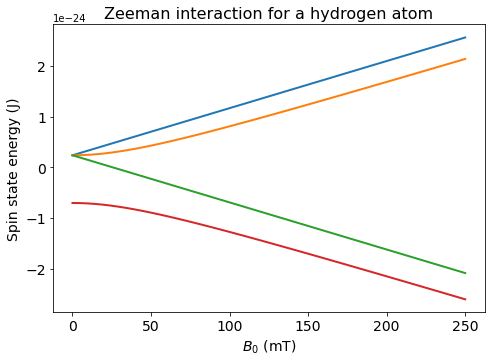

In [67]:
# Constants
h = 6.626e-34 # Planck's constant
ge = 2.0023 # Electron g-value
gn = 5.585695 # Proton g-value
muB = 9.27400968e-24 # Bohr magneton for an electron
muN = 5.05078324e-27 # Bohr magneton for a proton
mT2MHz = 28.025e6 # Convert hyperfine coupling to Hz
a = 50.7 * mT2MHz # hyperfine coupling constant for hydrogen in mT
B = np.linspace(0,0.25,100)
E_num = np.zeros([len(B), 4], dtype=np.complex128)

# Start the magnetic field sweep
for i,B0 in enumerate(B):
        H_num = H_f(a, h, ge, gn, muB, muN, B0)
        eig_num = np.linalg.eigh(H_num)
        E_num[i] = eig_num[0] # 0 = eigenvalues, 1 = eigenvectors

# Plot the result 
#%matplotlib notebook
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(B*1e3, np.real(E_num[:,::-1]), linewidth=2)
ax.set_title("Zeeman interaction for a hydrogen atom", size=16)
ax.set_xlabel('$B_0$ (mT)', size=14)
ax.set_ylabel('Spin state energy (J)', size=14)
plt.tick_params(labelsize=14)
plt.show()

We previously calculated the eigenvalues and eigenvectors for a radical pair via computational methods. Let's try and do it the old fashioned way!

The Hamiltonian for the H-atom is given by,

$$
\hat{H}_{hyper} = a \,\mathbf{\hat{s}} \bullet \mathbf{\hat{i}} = \frac{a}{4}\hat{\Omega},
$$

where 

$$
\hat{\Omega} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & -1 & 2 & 0 \\ 0 & 2 & -1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
$$

* Spin state $\color{red}{|1\rangle}$:

$$
\hat{\Omega} = \begin{bmatrix} \color{red}{1} & \color{red}{0} & \color{red}{0} & \color{red}{0} \\ \color{red}{0} & -1 & 2 & 0 \\ \color{red}{0} & 2 & -1 & 0 \\ \color{red}{0} & 0 & 0 & 1 \end{bmatrix}
$$

Already an eigenvector

Eigenvector: $\color{red}{|1\rangle} = \color{red}{|\alpha_s\rangle|\alpha_i\rangle}$

Eigenvalue: $\color{red}{E_1} = \color{red}{\frac{a}{4}}$

---

* Spin state $\color{blue}{|4\rangle}$:

$$
\hat{\Omega} = \begin{bmatrix} 1 & 0 & 0 & \color{blue}{0} \\ 0 & -1 & 2 & \color{blue}{0} \\ 0 & 2 & -1 & \color{blue}{0} \\ \color{blue}{0} & \color{blue}{0} & \color{blue}{0} & \color{blue}{1} \end{bmatrix}
$$

Already an eigenvector

Eigenvector: $\color{blue}{|4\rangle} = \color{blue}{|\beta_s\rangle|\beta_i\rangle}$

Eigenvalue: $\color{blue}{E_4} = \color{blue}{\frac{a}{4}}$

---

* Spin states $\color{orange}{|2\rangle}$ and $\color{orange}{|3\rangle}$:

$$
\hat{\Omega} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & \color{orange}{-1} & \color{orange}{2} & 0 \\ 0 & \color{orange}{2} & \color{orange}{-1} & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
$$

Not an eigenvector, therefore, we need to solve for eignevectors and eigenvalues. For any operator,

$$
\hat{\Omega}|\psi\rangle = \omega|\psi\rangle,
$$

then we introduce the identity (unit) vector, giving,

$$
\hat{\Omega}|\psi\rangle = \omega \hat{I}|\psi\rangle \\
\hat{\Omega}|\psi\rangle - \omega \hat{I}|\psi\rangle = 0 \\
(\hat{\Omega} - \omega \hat{I})|\psi\rangle = 0 \\
det(\hat{\Omega} - \omega \hat{I}) = 0
$$

From this we can find the eigenvectors and eigenvalues for spin states $\color{orange}{|2\rangle}$ and $\color{orange}{|3\rangle}$. Our new matrices are,

$$
\hat{\Omega} = \begin{bmatrix} -1 & 2 \\ 2 & -1 \end{bmatrix}, \,\,
\hat{I} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \,\,
\omega \hat{I} = \begin{bmatrix} \omega & 0 \\ 0 & \omega \end{bmatrix}
$$

Giving,

$$
\hat{\Omega} - \omega \hat{I} = \begin{bmatrix} -1 & 2 \\ 2 & -1 \end{bmatrix} - \begin{bmatrix} \omega & 0 \\ 0 & \omega \end{bmatrix} = \begin{bmatrix} -1-\omega & 2 \\ 2 & -1-\omega \end{bmatrix}
$$

Therefore,

$$
\begin{aligned}
det(\hat{\Omega} - \omega \hat{I}) &= (-1-\omega)^2 - 4 \\
&= 1 + 2\omega + \omega^2 -4 \\
&= \omega^2 + 2\omega - 3 \\
&= (\omega + 3) (\omega - 1)
\end{aligned}
$$

The roots of this equation $\omega = 1$ or $-3$ are the eigenvalues.

$$
(\hat{\Omega} - \omega \hat{I})|\psi\rangle = 
\begin{bmatrix}
-1-\omega & 2 \\ 
2 & -1-\omega 
\end{bmatrix}\begin{bmatrix} a \\ b \end{bmatrix} = 0
$$

Where $\omega = 1$,

$$
\begin{bmatrix} -2a + 2b \\ 2a - 2b \end{bmatrix} =
\begin{bmatrix} 0 \\ 0 \end{bmatrix} \implies
a = b
$$

After normalising, we obtain,

$$
\begin{bmatrix} a \\ b \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

Eigenvector: $\color{orange}{|2\rangle} = \color{orange}{\frac{1}{\sqrt{2}}\big(|\alpha_s\rangle|\beta_i\rangle + |\beta_s\rangle|\alpha_i\rangle\big)}$

Eigenvalue: $\color{orange}{E_2} = \color{orange}{\frac{a}{4}}$

---

Now when $\omega = -3$,

$$
\begin{bmatrix} 2a + 2b \\ 2a + 2b \end{bmatrix} =
\begin{bmatrix} 0 \\ 0 \end{bmatrix} \implies
a = -b
$$

After normalising, we obtain,

$$
\begin{bmatrix} a \\ -b \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}
$$

Eigenvector: $\color{orange}{|3\rangle} = \color{orange}{\frac{1}{\sqrt{2}}\big(|\alpha_s\rangle|\beta_i\rangle - |\beta_s\rangle|\alpha_i\rangle\big)}$

Eigenvalue: $\color{orange}{E_3} = \color{orange}{-\frac{3a}{4}}$

The above eigenvectors and eigenvalues are the zero field spin eigenstates of the hydrogen atom.